In [109]:
import pandas as pd #veri dosyalarını dataframe olarak yüklemek, verileri analiz etmek için
import numpy as np
import matplotlib.pyplot as plt #verilerinin grafiklerini çizmek için
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from sklearn import metrics
 
from sklearn.metrics import mean_absolute_error,roc_curve,accuracy_score,auc,roc_auc_score,confusion_matrix,precision_score,recall_score,f1_score, classification_report
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.model_selection import BaseCrossValidator, GridSearchCV, train_test_split,cross_val_score,cross_validate,cross_val_predict, KFold, StratifiedKFold, learning_curve
from sklearn.pipeline import Pipeline
# Standardization
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

from scipy import stats, integrate
from sklearn.model_selection import train_test_split 



# MEME KANSERİ

In [110]:
cancerset = pd.read_csv("C:\\Users\\ASUS\\Desktop\\4\\Machine Learning\\proje\\cancer.csv")


In [111]:
#train ve test datasetlerinin ilk 5 satırı ve feature'ları tablo halinde gösterildi.
print(cancerset.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

In [112]:
cancerset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [113]:
cancerset.drop('id',axis=1,inplace=True)
cancerset.drop('Unnamed: 32',axis=1,inplace=True)
len(cancerset) #boyut

569

In [114]:
cancerset.diagnosis.unique()

array(['M', 'B'], dtype=object)

MEME KANSERİ
diagnosis=teşhis, belirti, seviyesi
M = malignant(kötü niyetli), B = benign(iyi huylu)

In [115]:
cancerset['diagnosis'] = cancerset['diagnosis'].map({'M':1,'B':0})
cancerset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


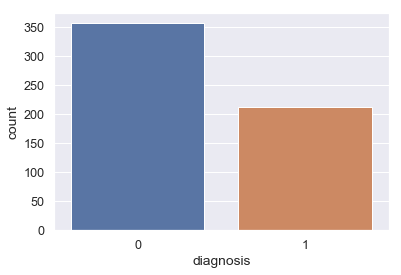

In [116]:
sns.countplot(x='diagnosis',data=cancerset)

In [117]:
features_mean=list(cancerset.columns[1:11])
# split dataframe into two based on diagnosis
cancersetM=cancerset[cancerset['diagnosis'] ==1]
cancersetB=cancerset[cancerset['diagnosis'] ==0]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

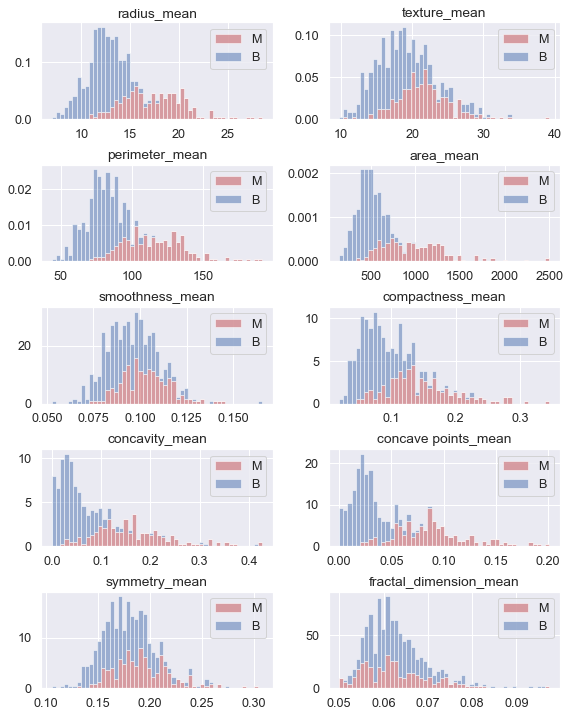

In [118]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancerset[features_mean[idx]]) - min(cancerset[features_mean[idx]]))/50
    ax.hist([cancersetM[features_mean[idx]],cancersetB[features_mean[idx]]], bins=np.arange(min(cancerset[features_mean[idx]]), max(cancerset[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','b'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [119]:
a=cancerset.loc[:, "radius_mean":"concave points_mean"]
b=cancerset["diagnosis"]

In [120]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3)

In [121]:
print("a_train: ",a_train.shape)
print("a_test: ",a_test.shape)
print("b_train: ",b_train.shape)
print("b_test: ",b_test.shape)


a_train:  (398, 8)
a_test:  (171, 8)
b_train:  (398,)
b_test:  (171,)


In [122]:
from sklearn.preprocessing import MinMaxScaler
sc_x= MinMaxScaler()
sc_x.fit(a_train)
a_train = sc_x.fit_transform(a_train)
a_test  = sc_x.transform(a_test )


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#öğrenme eğrisi grafiği
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test2_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test2_scores_mean = np.mean(test2_scores, axis=1)
    test2_scores_std = np.std(test2_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test2_scores_mean - test2_scores_std,
                     test2_scores_mean + test2_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test2_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt
#Doğrulama eğrisi grafiği
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test2_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test2_mean = np.mean(test2_scores, axis=1)
    test2_std = np.std(test2_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test2_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test2_mean + test2_std, test2_mean - test2_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

# LOGISTIC REGRESSION

In [124]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(a_train,b_train)
print('train accuracy',clf.score(a_train,b_train))

train accuracy 0.9321608040201005


In [125]:
b_pred = clf.predict(a_test)

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)

CLR=accuracy_score(b_test,b_pred)

print('test accuracy',accuracy_score(b_test,b_pred))


[[100   1]
 [ 13  57]]
test accuracy 0.9181286549707602


In [127]:
from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print('test',report)

test              precision    recall  f1-score   support

          0       0.88      0.99      0.93       101
          1       0.98      0.81      0.89        70

avg / total       0.92      0.92      0.92       171



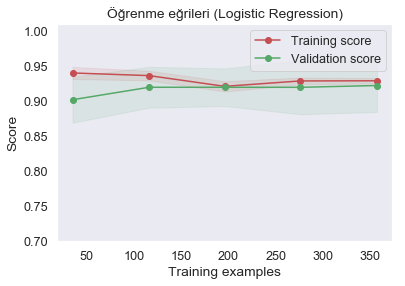

In [128]:
title = "Öğrenme eğrileri (Logistic Regression)"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# NAIVE BAYES

In [129]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(a_train, b_train)
print('train accuracy',clf.score(a_train,b_train))



b_pred = clf.predict(a_test)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)


print()

CNB=accuracy_score(b_test,b_pred)
print('test accuracy',accuracy_score(b_test,b_pred))


from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print()
print('classification_report:')
print()
print('test',report)


train accuracy 0.9170854271356784
[[97  4]
 [11 59]]

test accuracy 0.9122807017543859

classification_report:

test              precision    recall  f1-score   support

          0       0.90      0.96      0.93       101
          1       0.94      0.84      0.89        70

avg / total       0.91      0.91      0.91       171



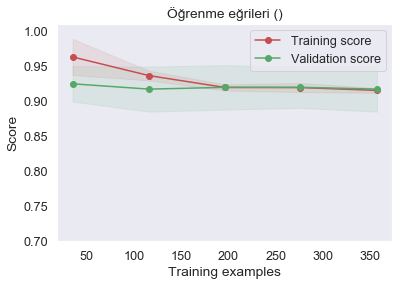

In [130]:
title = "Öğrenme eğrileri ()"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# K-NEAREST NEIGHBORS

In [131]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=8)

clf.fit(a_train, b_train)
print('train accuracy',clf.score(a_train,b_train))



b_pred = clf.predict(a_test)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)


print()

CKNN=accuracy_score(b_test,b_pred)
print('test accuracy',accuracy_score(b_test,b_pred))


from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.9547738693467337
[[97  4]
 [ 8 62]]

test accuracy 0.9298245614035088

classification_report:

test              precision    recall  f1-score   support

          0       0.92      0.96      0.94       101
          1       0.94      0.89      0.91        70

avg / total       0.93      0.93      0.93       171



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

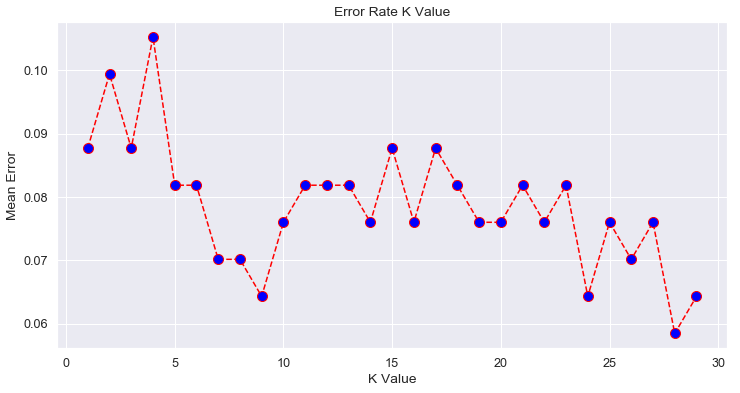

In [132]:
error = []

for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(a_train,b_train)
    pred_i = knn.predict(a_test)
    error.append(np.mean(pred_i != b_test))
    plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

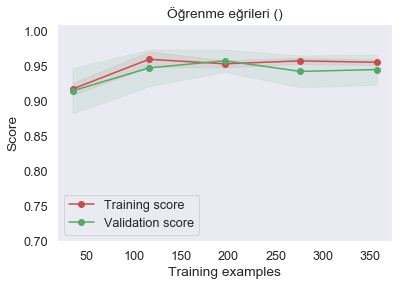

In [133]:
title = "Öğrenme eğrileri ()"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# DECISION TREE

In [134]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()  
clf.fit(a_train, b_train)
print('train accuracy',clf.score(a_train,b_train))



b_pred = clf.predict(a_test)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)


print()

CDT=accuracy_score(b_test,b_pred)
print('test accuracy',accuracy_score(b_test,b_pred))


from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print()
print('classification_report:')
print()
print('test',report)


train accuracy 1.0
[[95  6]
 [10 60]]

test accuracy 0.9064327485380117

classification_report:

test              precision    recall  f1-score   support

          0       0.90      0.94      0.92       101
          1       0.91      0.86      0.88        70

avg / total       0.91      0.91      0.91       171



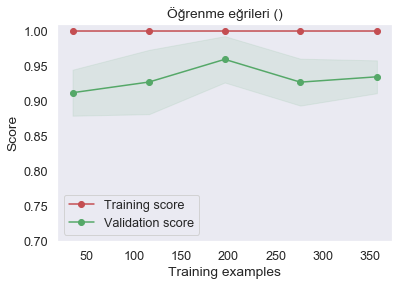

In [135]:
title = "Öğrenme eğrileri ()"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# RANDOM FOREST

In [136]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
                           #,min_samples_split=25, max_depth=7, max_features=2)

clf.fit(a_train, b_train)
print('train accuracy',clf.score(a_train,b_train))



b_pred = clf.predict(a_test)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)


print()

CRF=accuracy_score(b_test,b_pred)
print('test accuracy',accuracy_score(b_test,b_pred))


from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 1.0
[[96  5]
 [ 8 62]]

test accuracy 0.9239766081871345

classification_report:

test              precision    recall  f1-score   support

          0       0.92      0.95      0.94       101
          1       0.93      0.89      0.91        70

avg / total       0.92      0.92      0.92       171



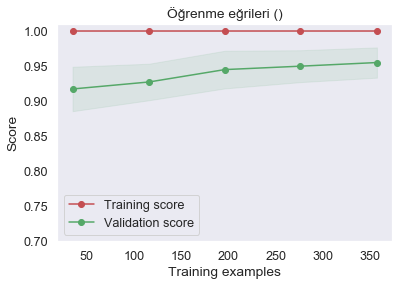

In [137]:
title = "Öğrenme eğrileri ()"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# GRADIENT BOOSTING MACHINES

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

clf.fit(a_train, b_train)
print('train accuracy',clf.score(a_train,b_train))



b_pred = clf.predict(a_test)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)


print()

CGBM=accuracy_score(b_test,b_pred)
print('test accuracy',accuracy_score(b_test,b_pred))


from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 1.0
[[95  6]
 [ 9 61]]

test accuracy 0.9122807017543859

classification_report:

test              precision    recall  f1-score   support

          0       0.91      0.94      0.93       101
          1       0.91      0.87      0.89        70

avg / total       0.91      0.91      0.91       171



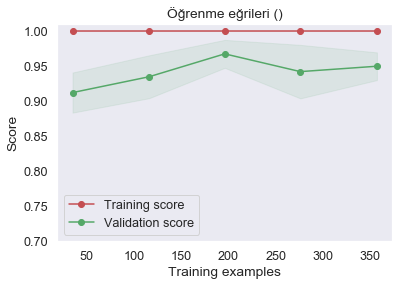

In [139]:
title = "Öğrenme eğrileri ()"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# KERNELIZED SUPPORT VECTOR

In [140]:
from sklearn.svm import SVC
clf = SVC( random_state = 0)

clf.fit(a_train, b_train)
print('train accuracy',clf.score(a_train,b_train))



b_pred = clf.predict(a_test)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)


print()

CKSV=accuracy_score(b_test,b_pred)
print('test accuracy',accuracy_score(b_test,b_pred))


from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.9321608040201005
[[100   1]
 [ 13  57]]

test accuracy 0.9181286549707602

classification_report:

test              precision    recall  f1-score   support

          0       0.88      0.99      0.93       101
          1       0.98      0.81      0.89        70

avg / total       0.92      0.92      0.92       171



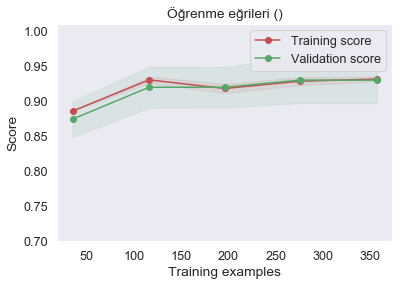

In [141]:
title = "Öğrenme eğrileri ()"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# PERCEPTRON

In [142]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=50)

clf.fit(a_train, b_train)
print('train accuracy',clf.score(a_train,b_train))



b_pred = clf.predict(a_test)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(b_test,b_pred)

print(cm)


print()

CP=accuracy_score(b_test,b_pred)
print('test accuracy',accuracy_score(b_test,b_pred))


from sklearn.metrics import classification_report
report = classification_report(b_test, b_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.9346733668341709
[[100   1]
 [ 13  57]]

test accuracy 0.9181286549707602

classification_report:

test              precision    recall  f1-score   support

          0       0.88      0.99      0.93       101
          1       0.98      0.81      0.89        70

avg / total       0.92      0.92      0.92       171



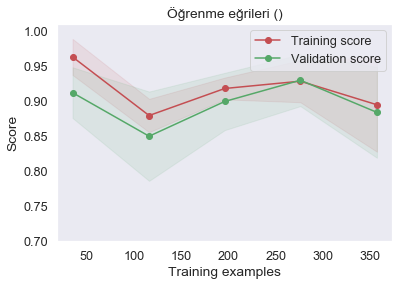

In [143]:
title = "Öğrenme eğrileri ()"
cv = 10
plot_learning_curve(clf, title, a_train, b_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# MEME KANSERİ TRAIN-TEST (accuracy)

In [144]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting Machines', 
              'Kernelized Support Vector', 'Perceptron',],
    'Score': [CLR, CNB, CKNN, 
              CDT, CRF, CGBM, 
              CKSV, CP]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,K-Nearest Neighbors,0.929825
4,Random Forest,0.923977
0,Logistic Regression,0.918129
6,Kernelized Support Vector,0.918129
7,Perceptron,0.918129
1,Naive Bayes,0.912281
5,Gradient Boosting Machines,0.912281
3,Decision Tree,0.906433


# KALP HASTALIĞI

In [145]:
heartdiseaseset = pd.read_csv("C:\\Users\\ASUS\\Desktop\\4\\Machine Learning\\proje\\HeartDiseaseData.csv", na_values="?")
heartdiseaseset["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])
heartdiseaseset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [146]:
#train ve test datasetlerinin ilk 5 satırı ve feature'ları tablo halinde gösterildi.
print(heartdiseaseset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slop  \
0   63    1   1       145   233    1        2      150      0      2.3     3   
1   67    1   4       160   286    0        2      108      1      1.5     2   
2   67    1   4       120   229    0        2      129      1      2.6     2   
3   37    1   3       130   250    0        0      187      0      3.5     3   
4   41    0   2       130   204    0        2      172      0      1.4     1   

    ca  thal  pred_attribute  
0  0.0   6.0               0  
1  3.0   3.0               1  
2  2.0   7.0               1  
3  0.0   3.0               0  
4  0.0   3.0               0  


In [147]:
heartdiseaseset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


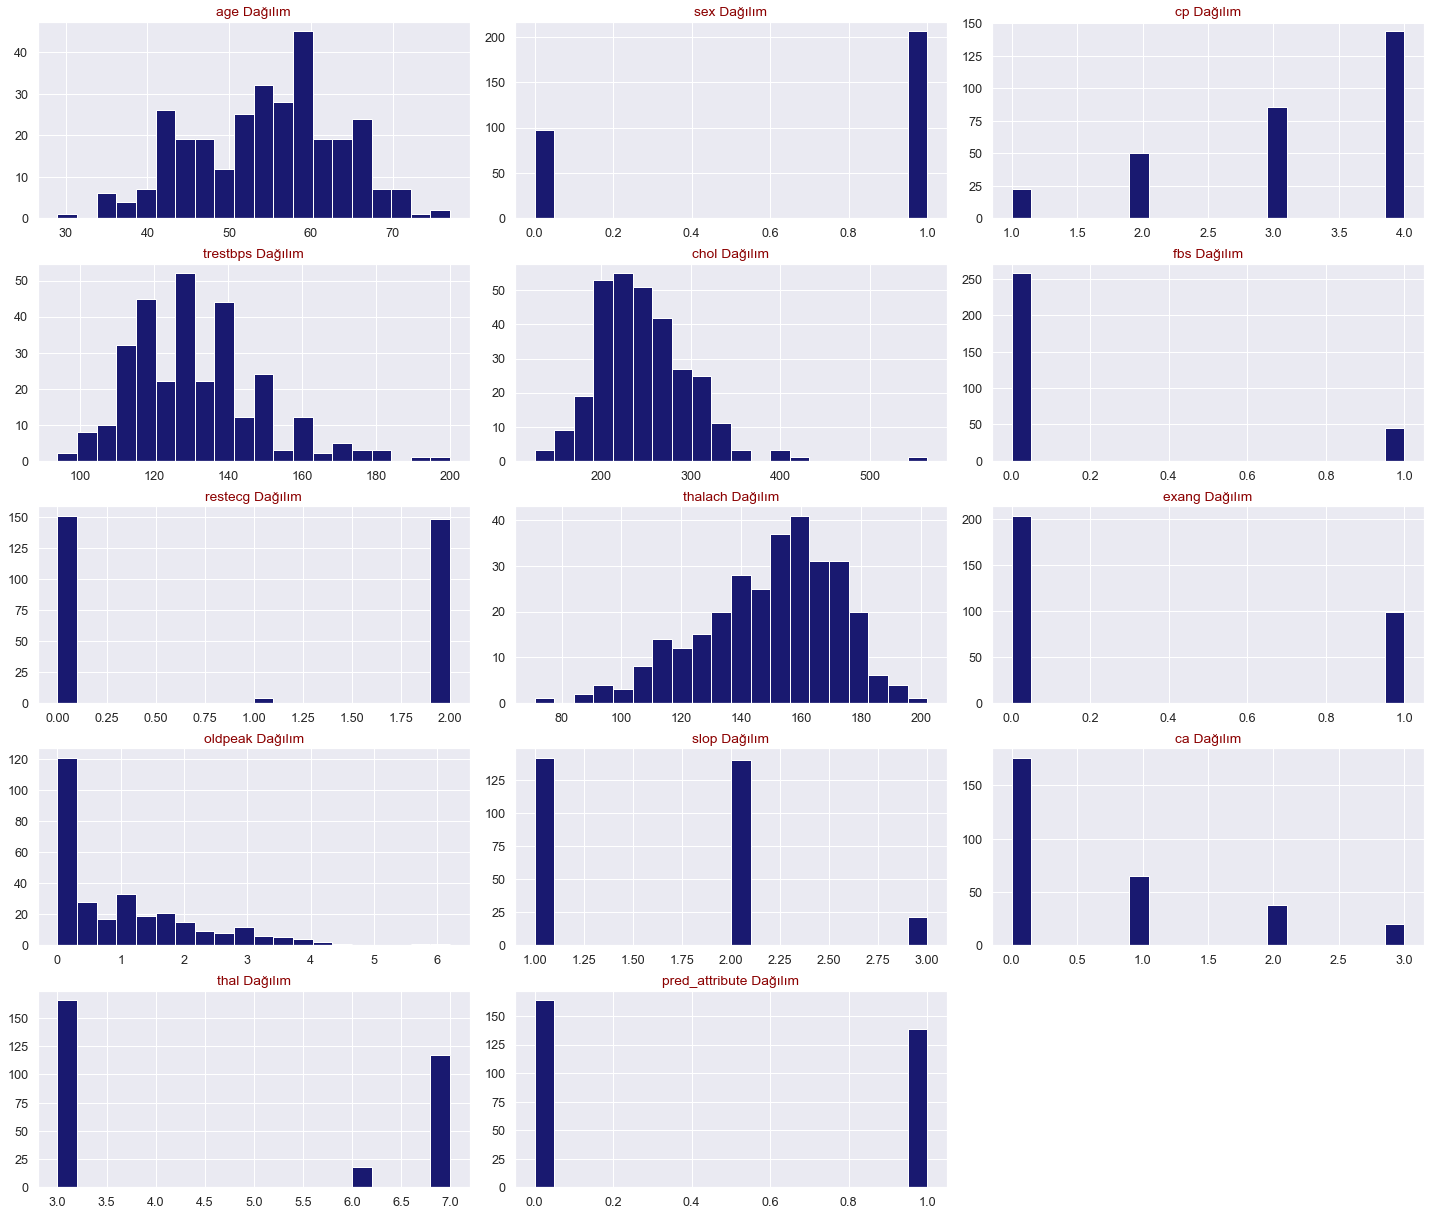

In [148]:

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Dağılım",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heartdiseaseset,heartdiseaseset.columns,6,3)


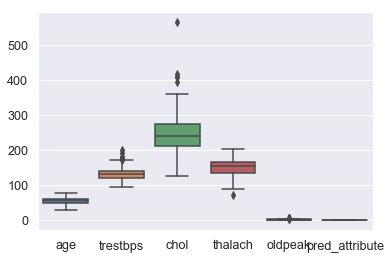

In [149]:
features_continuous=["age", "trestbps", "chol", "thalach", "oldpeak", "pred_attribute"]
sns.boxplot(data=heartdiseaseset[features_continuous])
#plt.gcf().set_size_inches(20,15)
plt.show()

In [150]:
heartdiseaseset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


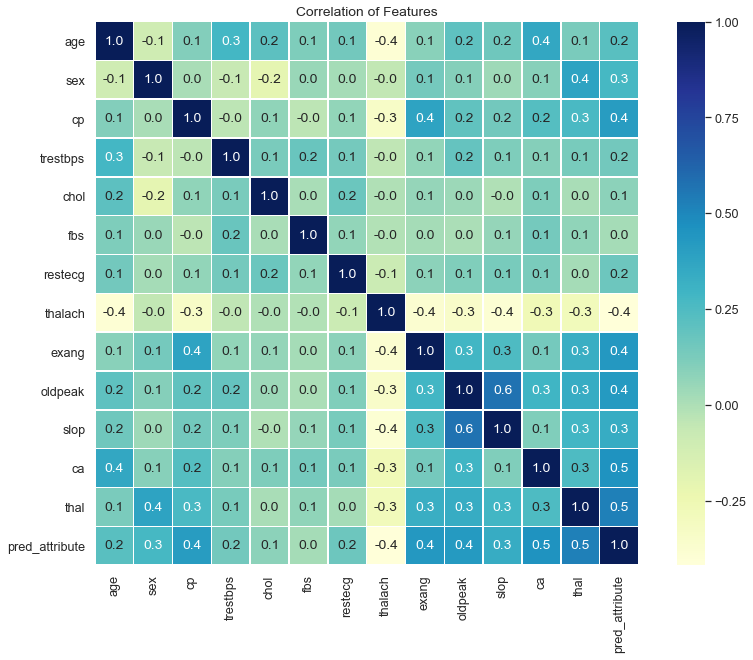

In [151]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(heartdiseaseset.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

In [152]:
heartdiseaseset.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                4
thal              2
pred_attribute    0
dtype: int64

In [153]:
heartdiseaseset.fillna(method='ffill')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [154]:
heartdiseaseset.dropna(inplace=True, axis=0, how="any")

In [155]:
X=heartdiseaseset.loc[:, "age":"thal" ]
Y=heartdiseaseset["pred_attribute"]

In [156]:
X_traink, X_testk, Y_traink, Y_testk = train_test_split(X, Y, test_size=0.3, random_state=0)

In [157]:
print("X_traink: ",X_traink.shape)
print("X_testk: ",X_testk.shape)
print("Y_traink: ",Y_traink.shape)
print("Y_testk: ",Y_testk.shape)


X_traink:  (207, 13)
X_testk:  (90, 13)
Y_traink:  (207,)
Y_testk:  (90,)


In [158]:
#X = heartdiseaseset.iloc[:, :-1].values  
#Y = heartdiseaseset.iloc[:, -1].values  # = dataset.iloc[:, 13].values
#data = heartdiseaseset[heartdiseaseset.columns[:13]]
#outcome = heartdiseaseset['pred_attribute']

#train,test=train_test_split(dataset,test_size=0.25,random_state=0,stratify=dataset['pred_attribute'])# stratify the outcome
#train_X=train[train.columns[:13]]
#test_X=test[test.columns[:13]]
#train_Y=train['pred_attribute']
#test_Y=test['pred_attribute']



In [159]:
'''
from sklearn.model_selection import train_test_split
X_traink, X_testk, Y_traink, Y_testk = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_traink: ",X_traink.shape)
print("X_testk: ",X_testk.shape)
print("Y_traink: ",Y_traink.shape)
print("Y_testk: ",Y_testk.shape)



from sklearn.model_selection import train_test_split
x_traink,x_testk,y_traink,y_testk=train_test_split(x,y,test_size=0.2,random_state=42)
# One-hot encoding and back to min-max norm
y = np_utils.to_categorical(targets,num_classes=2)
dN = preprocessing.minmax_scale(d, feature_range=(0, 1), axis=0, copy=True)
#train_X, test_X, train_y, test_y = train_test_split(dN, y, train_size=0.5, random_state=0)
'''


'\nfrom sklearn.model_selection import train_test_split\nX_traink, X_testk, Y_traink, Y_testk = train_test_split(X, Y, test_size=0.2, random_state=42)\n\nprint("X_traink: ",X_traink.shape)\nprint("X_testk: ",X_testk.shape)\nprint("Y_traink: ",Y_traink.shape)\nprint("Y_testk: ",Y_testk.shape)\n\n\n\nfrom sklearn.model_selection import train_test_split\nx_traink,x_testk,y_traink,y_testk=train_test_split(x,y,test_size=0.2,random_state=42)\n# One-hot encoding and back to min-max norm\ny = np_utils.to_categorical(targets,num_classes=2)\ndN = preprocessing.minmax_scale(d, feature_range=(0, 1), axis=0, copy=True)\n#train_X, test_X, train_y, test_y = train_test_split(dN, y, train_size=0.5, random_state=0)\n'

In [160]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_traink = sc_X.fit_transform(X_traink)
X_testk = sc_X.transform(X_testk)


#scaler = StandardScaler()
#x = scaler.fit_transform(x)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X.fit(x_traink)
x_traink = sc_X.fit_transform(x_traink)
x_testk = sc_.transform(x_testk)

from sklearn.preprocessing import MinMaxScaler
sc_x= MinMaxScaler()
sc_x.fit(x_traink)
x_traink = sc_x.fit_transform(x_traink)
x_testk  = sc_x.transform(x_testk )


# LOGISTIC REGRESSION

In [161]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_traink, Y_traink)
model.score(X_traink, Y_traink)
model.score(X_testk, Y_testk)
'''
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_traink,Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))

train accuracy 0.8695652173913043


In [162]:
Y_pred = clf.predict(X_testk)

In [163]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)

LR=accuracy_score(Y_testk,Y_pred)

print('test accuracy',accuracy_score(Y_testk,Y_pred))


[[44  4]
 [11 31]]
test accuracy 0.8333333333333334


In [164]:
'''# Generate a simple plot of the test and training learning curve
def plot_learning_curve(estimator, title, X, Y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return plt

#gnb_plot = plot_learning_curve(gnb_est,"GNB learning curves",X_train,Y_train,cv=kfold)
mlp_plot = plot_learning_curve(mlp_est,"MLP learning curves",x_traink,y_traink,cv=kfold)
lr_plot = plot_learning_curve(lr_est,"LR learning curves",x_traink,y_traink,cv=kfold)
svc_plot = plot_learning_curve(svc_est,"SVC learning curves",x_traink,y_traink,cv=kfold)
#xgb_plot = plot_learning_curve(xgb_gscv.best_estimator_,"XBG learning curves",X_train,Y_train,cv=kfold)
'''

'# Generate a simple plot of the test and training learning curve\ndef plot_learning_curve(estimator, title, X, Y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)): \n    plt.figure()\n    plt.title(title)\n    if ylim is not None:\n        plt.ylim(*ylim)\n    plt.xlabel("Training examples")\n    plt.ylabel("Score")\n    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)\n    train_scores_mean = np.mean(train_scores, axis=1)\n    train_scores_std = np.std(train_scores, axis=1)\n    test_scores_mean = np.mean(test_scores, axis=1)\n    test_scores_std = np.std(test_scores, axis=1)\n    plt.grid()\n    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\n                     train_scores_mean + train_scores_std, alpha=0.1,color="r")\n    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\n                     test_scores_mean + test_scores_std, alpha=0.1, color="g")\n   

In [165]:
from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print('test',report)

test              precision    recall  f1-score   support

          0       0.80      0.92      0.85        48
          1       0.89      0.74      0.81        42

avg / total       0.84      0.83      0.83        90



# NAIVE BAYES

In [166]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_traink, Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))



Y_pred = clf.predict(X_testk)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)


print()

NB=accuracy_score(Y_testk,Y_pred)
print('test accuracy',accuracy_score(Y_testk,Y_pred))


from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print()
print('classification_report:')
print()
print('test',report)



train accuracy 0.855072463768116
[[44  4]
 [10 32]]

test accuracy 0.8444444444444444

classification_report:

test              precision    recall  f1-score   support

          0       0.81      0.92      0.86        48
          1       0.89      0.76      0.82        42

avg / total       0.85      0.84      0.84        90



# K-NEAREST NEIGHBORS

In [167]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=20)

clf.fit(X_traink, Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))



Y_pred = clf.predict(X_testk)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)


print()

KNN=accuracy_score(Y_testk,Y_pred)
print('test1 accuracy',accuracy_score(Y_testk,Y_pred))


from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.8502415458937198
[[45  3]
 [11 31]]

test1 accuracy 0.8444444444444444

classification_report:

test              precision    recall  f1-score   support

          0       0.80      0.94      0.87        48
          1       0.91      0.74      0.82        42

avg / total       0.85      0.84      0.84        90



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

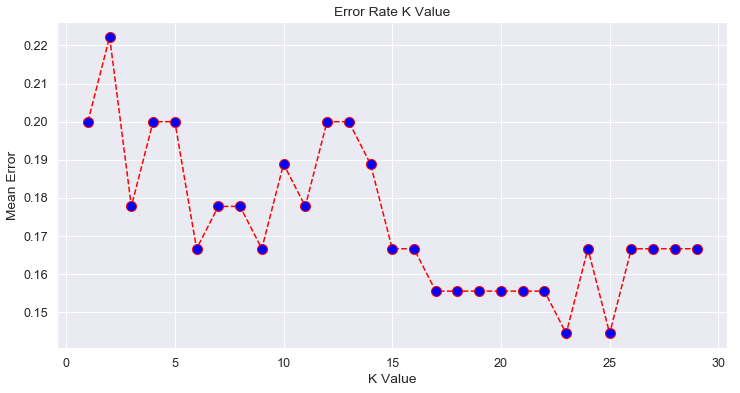

In [168]:
error = []

for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_traink,Y_traink)
    pred_i = knn.predict(X_testk)
    error.append(np.mean(pred_i != Y_testk))
    plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

# DECISION TREE

In [169]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()  
clf.fit(X_traink, Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))



Y_pred = clf.predict(X_testk)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)


print()

DT=accuracy_score(Y_testk,Y_pred)
print('test1 accuracy',accuracy_score(Y_testk,Y_pred))


from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 1.0
[[33 15]
 [ 8 34]]

test1 accuracy 0.7444444444444445

classification_report:

test              precision    recall  f1-score   support

          0       0.80      0.69      0.74        48
          1       0.69      0.81      0.75        42

avg / total       0.75      0.74      0.74        90



# RANDOM FOREST

In [170]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(X_traink, Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))



Y_pred = clf.predict(X_testk)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)


print()

RF=accuracy_score(Y_testk,Y_pred)
print('test1 accuracy',accuracy_score(Y_testk,Y_pred))


from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.9951690821256038
[[41  7]
 [15 27]]

test1 accuracy 0.7555555555555555

classification_report:

test              precision    recall  f1-score   support

          0       0.73      0.85      0.79        48
          1       0.79      0.64      0.71        42

avg / total       0.76      0.76      0.75        90



# GRADIENT BOOSTING MACHINES

In [171]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

clf.fit(X_traink, Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))



Y_pred = clf.predict(X_testk)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)


print()

GBM=accuracy_score(Y_testk,Y_pred)
print('test1 accuracy',accuracy_score(Y_testk,Y_pred))


from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 1.0
[[36 12]
 [11 31]]

test1 accuracy 0.7444444444444445

classification_report:

test              precision    recall  f1-score   support

          0       0.77      0.75      0.76        48
          1       0.72      0.74      0.73        42

avg / total       0.74      0.74      0.74        90



# KERNELIZED SUPPORT VECTOR

In [172]:
from sklearn.svm import SVC
clf = SVC( random_state = 0)

clf.fit(X_traink, Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))



Y_pred = clf.predict(X_testk)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)


print()

KSV=accuracy_score(Y_testk,Y_pred)
print('test1 accuracy',accuracy_score(Y_testk,Y_pred))


from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.9130434782608695
[[44  4]
 [10 32]]

test1 accuracy 0.8444444444444444

classification_report:

test              precision    recall  f1-score   support

          0       0.81      0.92      0.86        48
          1       0.89      0.76      0.82        42

avg / total       0.85      0.84      0.84        90



# PERCEPTRON

In [173]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=100)

clf.fit(X_traink, Y_traink)
print('train accuracy',clf.score(X_traink,Y_traink))



Y_pred = clf.predict(X_testk)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(Y_testk,Y_pred)

print(cm)


print()

P=accuracy_score(Y_testk,Y_pred)
print('test1 accuracy',accuracy_score(Y_testk,Y_pred))


from sklearn.metrics import classification_report
report = classification_report(Y_testk, Y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.8502415458937198
[[44  4]
 [10 32]]

test1 accuracy 0.8444444444444444

classification_report:

test              precision    recall  f1-score   support

          0       0.81      0.92      0.86        48
          1       0.89      0.76      0.82        42

avg / total       0.85      0.84      0.84        90



# KALP TRAIN-TEST (accuracy)

In [174]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting Machines', 
              'Kernelized Support Vector', 'Perceptron',],
    'Score': [LR, NB, KNN, 
              DT, RF, GBM, 
              KSV, P]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.844444
2,K-Nearest Neighbors,0.844444
6,Kernelized Support Vector,0.844444
7,Perceptron,0.844444
0,Logistic Regression,0.833333
4,Random Forest,0.755556
3,Decision Tree,0.744444
5,Gradient Boosting Machines,0.744444


# DİYABET HASTALIĞI

In [175]:
diabetesset = pd.read_csv("C:\\Users\\ASUS\\Desktop\\4\\Machine Learning\\proje\\diabetes.csv")

In [176]:
print(diabetesset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


In [177]:
diabetesset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

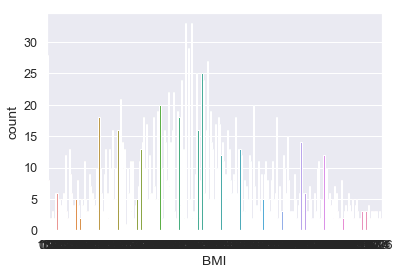

In [178]:
sns.countplot(x='BMI',data=diabetesset)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda

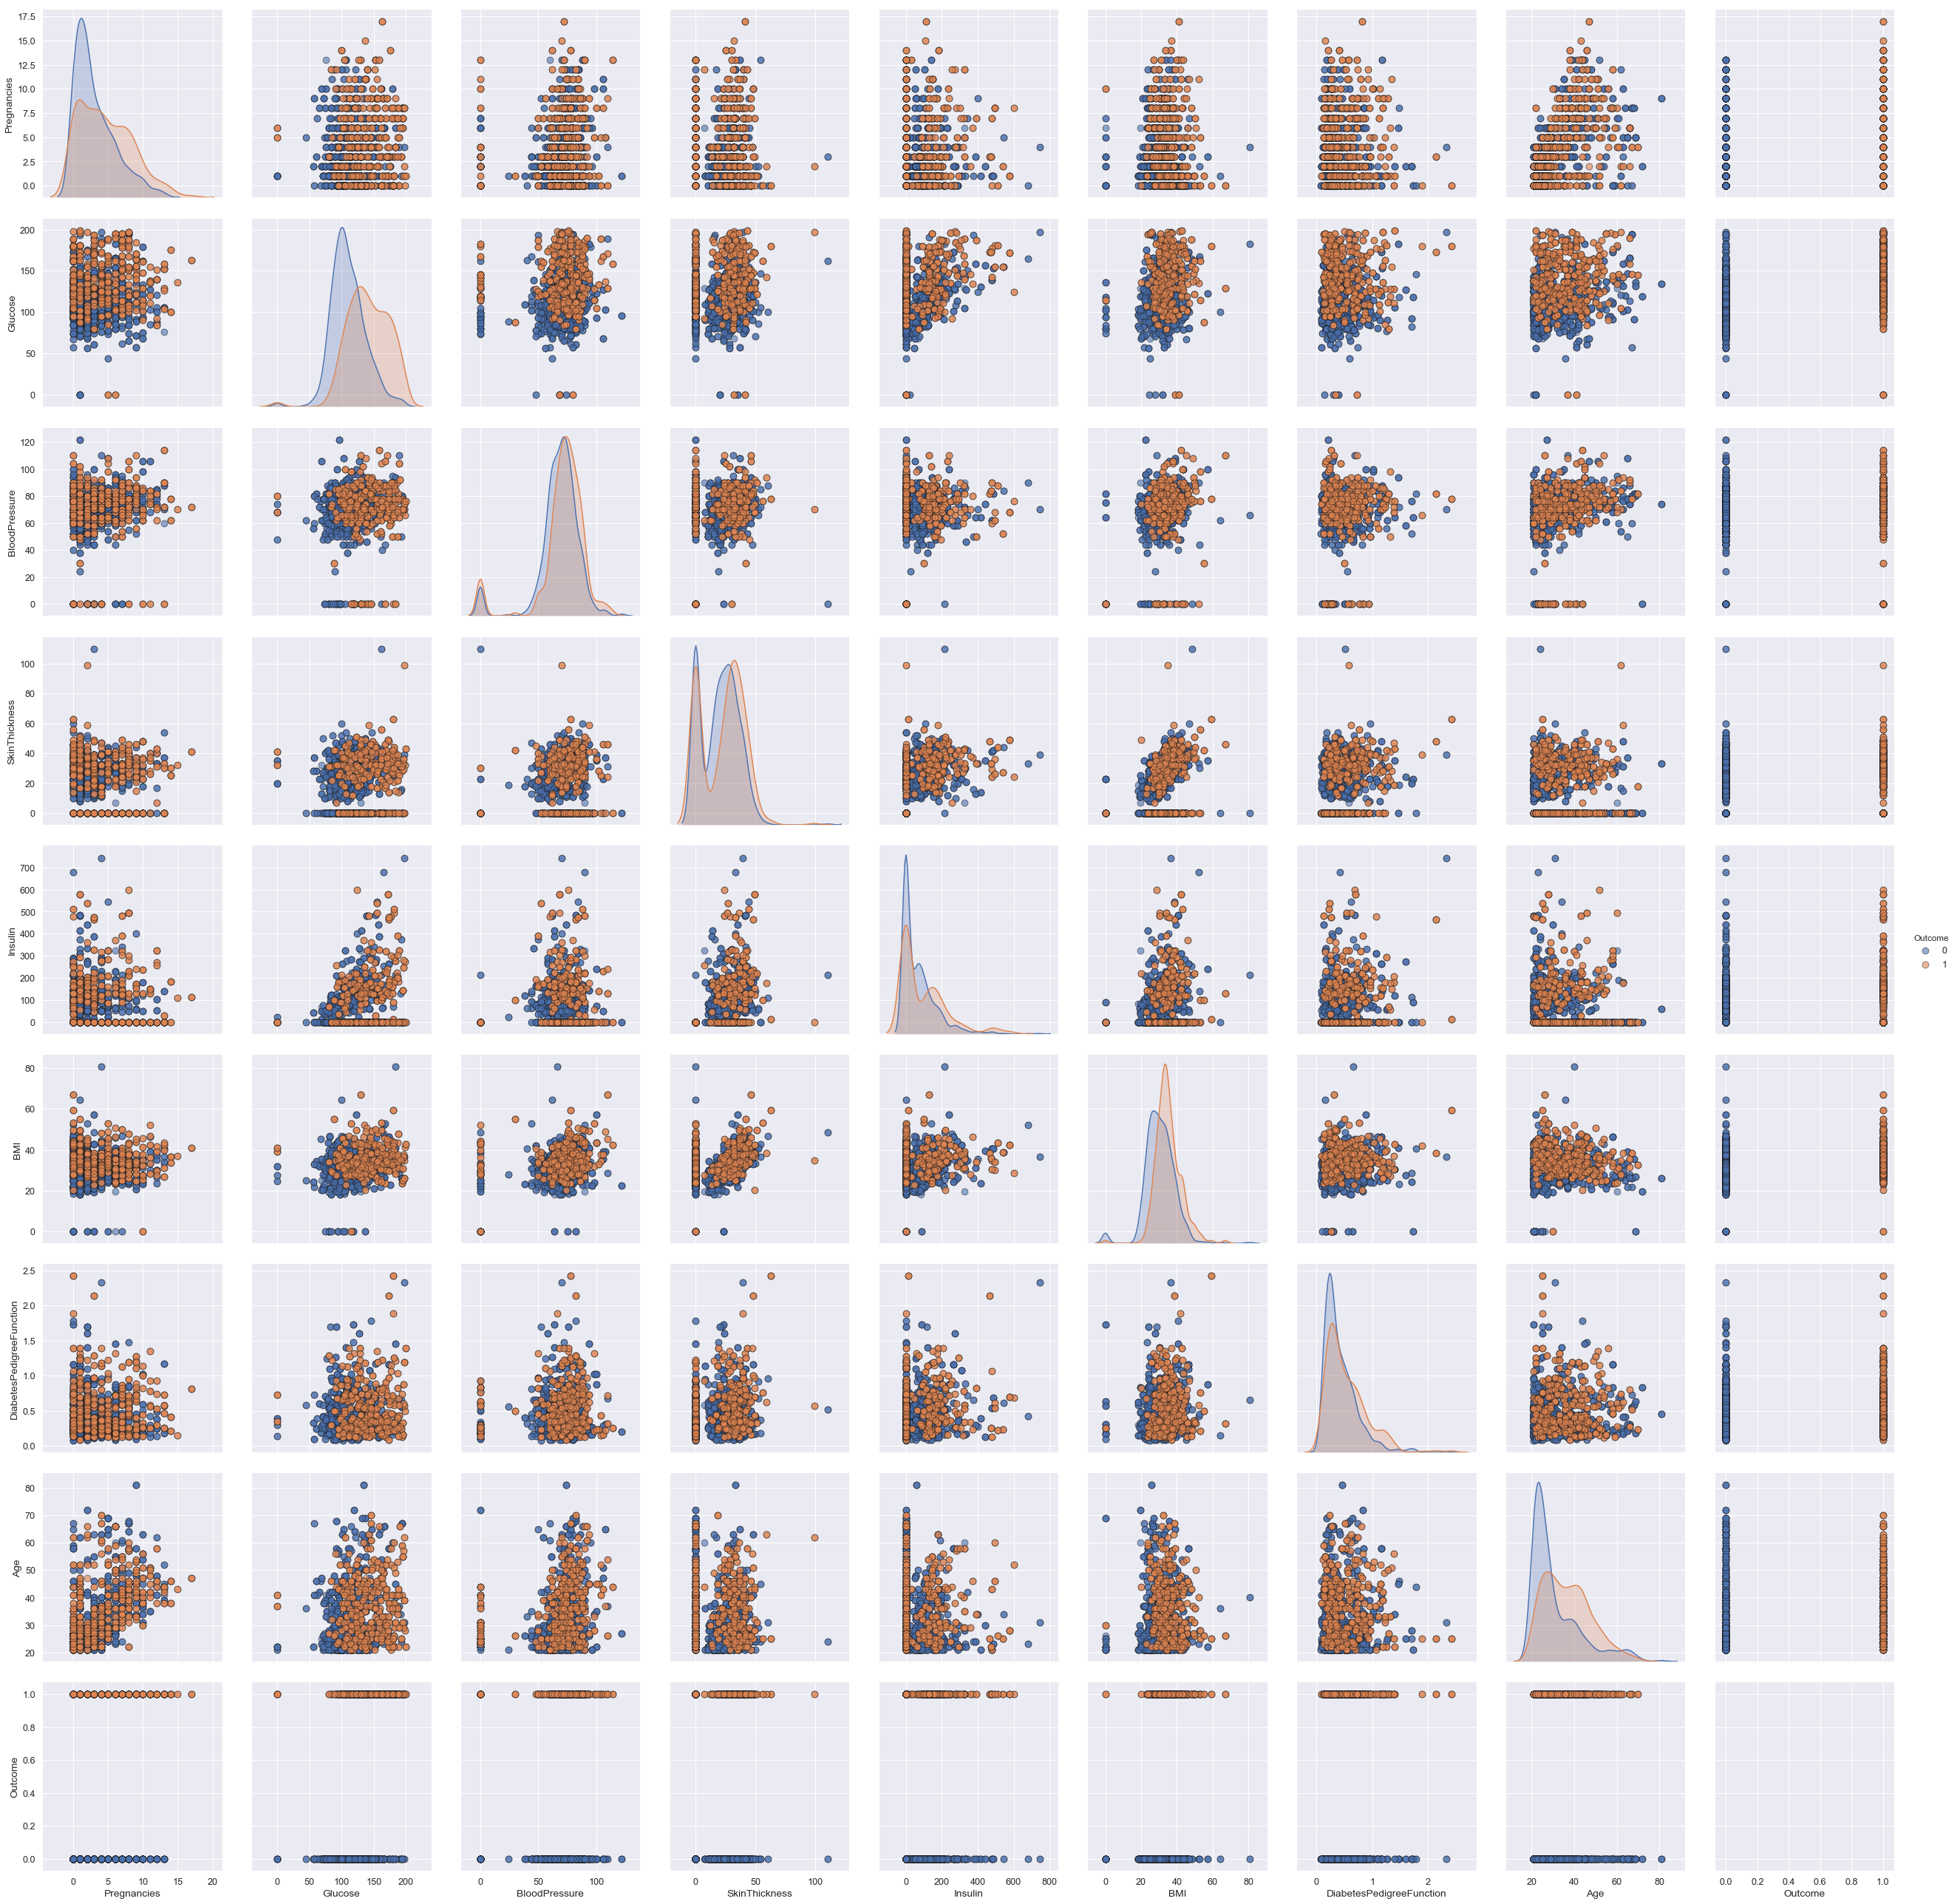

In [179]:

sns.pairplot(diabetesset, hue = 'Outcome', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [180]:
diabetesset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


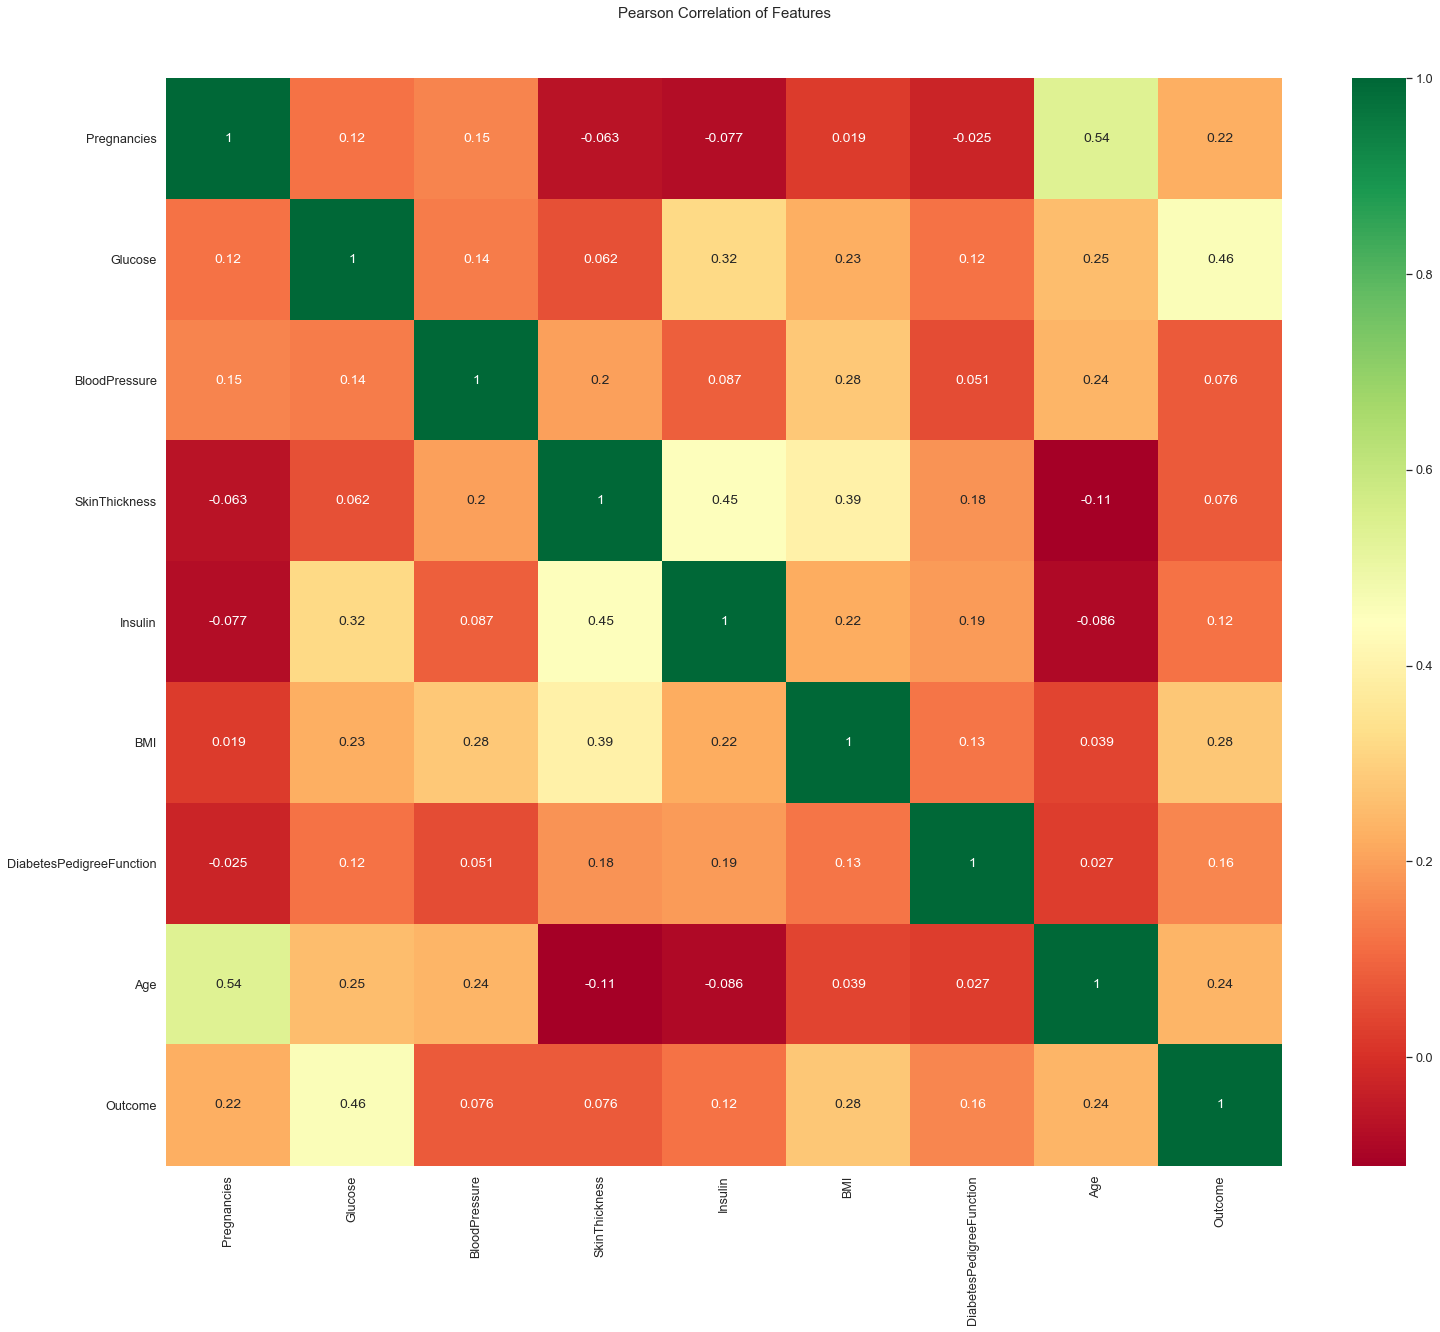

In [181]:
sns.heatmap(diabetesset[diabetesset.columns[:14]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

In [182]:
y=diabetesset.Outcome.values

In [183]:
x_diabetesset=diabetesset.iloc[:,:8]
x_diabetesset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [184]:
x=(x_diabetesset-np.min(x_diabetesset))/(np.max(x_diabetesset)-np.min(x_diabetesset))
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000


In [185]:
from sklearn.model_selection import train_test_split
x_traind,x_testd,y_traind,y_testd=train_test_split(x,y,test_size=0.2,random_state=42)

print("x_traind: ",x_traind.shape)
print("x_testd: ",x_testd.shape)
print("y_traind: ",y_traind.shape)
print("y_testd: ",y_testd.shape)

x_traind:  (1600, 8)
x_testd:  (400, 8)
y_traind:  (1600,)
y_testd:  (400,)


In [186]:
from sklearn.preprocessing import MinMaxScaler
sc_x= MinMaxScaler()
sc_x.fit(x_traind)
x_traind = sc_x.fit_transform(x_traind)
x_testd  = sc_x.transform(x_testd )


# LOGISTIC REGRESSION

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(x_traind,y_traind)

#y_pred = clf.predict(x_testd)
#print(accuracy_score(y_testd,y_pred))

print('train accuracy',clf.score(x_traind,y_traind))

train accuracy 0.773125


In [188]:
y_pred = clf.predict(x_testd)


In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)

DLR=accuracy_score(y_testd,y_pred)

print('test accuracy',accuracy_score(y_testd,y_pred))


[[233  20]
 [ 66  81]]
test accuracy 0.785


In [190]:
from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print('test',report)


test              precision    recall  f1-score   support

          0       0.78      0.92      0.84       253
          1       0.80      0.55      0.65       147

avg / total       0.79      0.79      0.77       400



In [191]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#öğrenme eğrisi grafiği
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test2_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test2_scores_mean = np.mean(test2_scores, axis=1)
    test2_scores_std = np.std(test2_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test2_scores_mean - test2_scores_std,
                     test2_scores_mean + test2_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test2_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt
#Doğrulama eğrisi grafiği
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test2_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test2_mean = np.mean(test2_scores, axis=1)
    test2_std = np.std(test2_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test2_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test2_mean + test2_std, test2_mean - test2_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

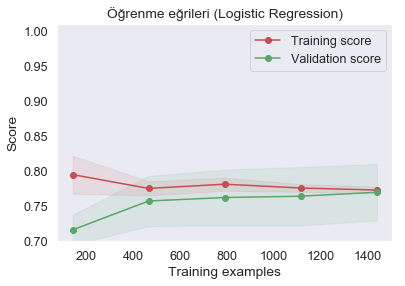

In [192]:
title = "Öğrenme eğrileri (Logistic Regression)"
cv = 10
plot_learning_curve(clf, title, x_traind, y_traind, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# NAIVE BAYES

In [193]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_traind, y_traind)
print('train accuracy',clf.score(x_traind,y_traind))



y_pred = clf.predict(x_testd)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)


print()

DNB=accuracy_score(y_testd,y_pred)
print('test1 accuracy',accuracy_score(y_testd,y_pred))


from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print()
print('classification_report:')
print()
print('test',report)




train accuracy 0.759375
[[220  33]
 [ 56  91]]

test1 accuracy 0.7775

classification_report:

test              precision    recall  f1-score   support

          0       0.80      0.87      0.83       253
          1       0.73      0.62      0.67       147

avg / total       0.77      0.78      0.77       400



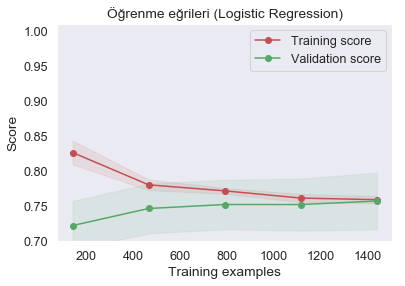

In [194]:
title = "Öğrenme eğrileri (Logistic Regression)"
cv = 10
plot_learning_curve(clf, title, x_traind, y_traind, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# K-NEAREST NEIGHBORS

In [195]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_traind, y_traind)
print('train accuracy',clf.score(x_traind,y_traind))



y_pred = clf.predict(x_testd)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)


print()

DKNN=accuracy_score(y_testd,y_pred)
print('test1 accuracy',accuracy_score(y_testd,y_pred))


from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.985625
[[246   7]
 [ 38 109]]

test1 accuracy 0.8875

classification_report:

test              precision    recall  f1-score   support

          0       0.87      0.97      0.92       253
          1       0.94      0.74      0.83       147

avg / total       0.89      0.89      0.88       400



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

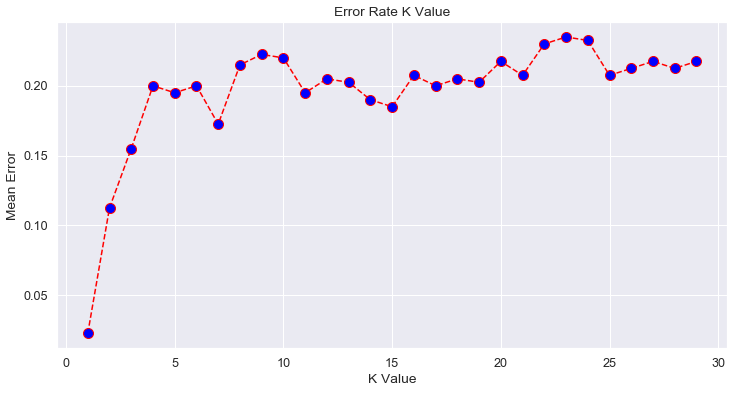

In [196]:
error = []

for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_traind, y_traind)
    pred_i = knn.predict(x_testd)
    error.append(np.mean(pred_i != y_testd))
    plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

# DECISION TREE

In [197]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()  
clf.fit(x_traind, y_traind)
print('train accuracy',clf.score(x_traind,y_traind))



y_pred = clf.predict(x_testd)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)


print()

DDT=accuracy_score(y_testd,y_pred)
print('test1 accuracy',accuracy_score(y_testd,y_pred))


from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 1.0
[[245   8]
 [  0 147]]

test1 accuracy 0.98

classification_report:

test              precision    recall  f1-score   support

          0       1.00      0.97      0.98       253
          1       0.95      1.00      0.97       147

avg / total       0.98      0.98      0.98       400



# RANDOM FOREST

In [198]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50, random_state=0)

clf.fit(x_traind, y_traind)
print('train accuracy',clf.score(x_traind,y_traind))



y_pred = clf.predict(x_testd)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)


print()

DRF=accuracy_score(y_testd,y_pred)
print('test1 accuracy',accuracy_score(y_testd,y_pred))


from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 1.0
[[249   4]
 [  4 143]]

test1 accuracy 0.98

classification_report:

test              precision    recall  f1-score   support

          0       0.98      0.98      0.98       253
          1       0.97      0.97      0.97       147

avg / total       0.98      0.98      0.98       400



# GRADIENT BOOSTING MACHINES

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

clf.fit(x_traind, y_traind)
print('train accuracy',clf.score(x_traind,y_traind))



y_pred = clf.predict(x_testd)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)


print()

DGBM=accuracy_score(y_testd,y_pred)
print('test1 accuracy',accuracy_score(y_testd,y_pred))


from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.905
[[242  11]
 [ 34 113]]

test1 accuracy 0.8875

classification_report:

test              precision    recall  f1-score   support

          0       0.88      0.96      0.91       253
          1       0.91      0.77      0.83       147

avg / total       0.89      0.89      0.89       400



# KERNELIZED SUPPORT VECTOR

In [200]:
from sklearn.svm import SVC
clf = SVC( random_state = 0)

clf.fit(x_traind, y_traind)
print('train accuracy',clf.score(x_traind,y_traind))



y_pred = clf.predict(x_testd)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)


print()

DKSV=accuracy_score(y_testd,y_pred)
print('test1 accuracy',accuracy_score(y_testd,y_pred))


from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.776875
[[233  20]
 [ 71  76]]

test1 accuracy 0.7725

classification_report:

test              precision    recall  f1-score   support

          0       0.77      0.92      0.84       253
          1       0.79      0.52      0.63       147

avg / total       0.78      0.77      0.76       400



# PERCEPTRON

In [201]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)

clf.fit(x_traind, y_traind)
print('train accuracy',clf.score(x_traind,y_traind))



y_pred = clf.predict(x_testd)

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_testd,y_pred)

print(cm)


print()

DP=accuracy_score(y_testd,y_pred)
print('test1 accuracy',accuracy_score(y_testd,y_pred))


from sklearn.metrics import classification_report
report = classification_report(y_testd, y_pred)
print()
print('classification_report:')
print()
print('test',report)

train accuracy 0.72875
[[178  75]
 [ 40 107]]

test1 accuracy 0.7125

classification_report:

test              precision    recall  f1-score   support

          0       0.82      0.70      0.76       253
          1       0.59      0.73      0.65       147

avg / total       0.73      0.71      0.72       400



# MEME KANSERİ TRAIN-TEST (accuracy)

In [202]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting Machines', 
              'Kernelized Support Vector', 'Perceptron',],
    'Score': [CLR, CNB, CKNN, 
              CDT, CRF, CGBM, 
              CKSV, CP]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,K-Nearest Neighbors,0.929825
4,Random Forest,0.923977
0,Logistic Regression,0.918129
6,Kernelized Support Vector,0.918129
7,Perceptron,0.918129
1,Naive Bayes,0.912281
5,Gradient Boosting Machines,0.912281
3,Decision Tree,0.906433


# KALP TRAIN-TEST (accuracy)

In [203]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting Machines', 
              'Kernelized Support Vector', 'Perceptron',],
    'Score': [LR, NB, KNN, 
              DT, RF, GBM, 
              KSV, P]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.844444
2,K-Nearest Neighbors,0.844444
6,Kernelized Support Vector,0.844444
7,Perceptron,0.844444
0,Logistic Regression,0.833333
4,Random Forest,0.755556
3,Decision Tree,0.744444
5,Gradient Boosting Machines,0.744444


# DİYABET TRAIN-TEST (accuracy)

In [204]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting Machines', 
              'Kernelized Support Vector', 'Perceptron',],
    'Score': [DLR, DNB, DKNN, 
              DDT, DRF, DGBM, 
              DKSV, DP]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Decision Tree,0.9800
4,Random Forest,0.9800
2,K-Nearest Neighbors,0.8875
5,Gradient Boosting Machines,0.8875
0,Logistic Regression,0.7850
1,Naive Bayes,0.7775
6,Kernelized Support Vector,0.7725
7,Perceptron,0.7125


In [205]:
'''#train_X, test_X, train_y, test_y = train_test_split(dN, y, train_size=0.5, random_state=0)
traincs, testcs = train_test_split(cancerset, test_size = 0.3)'''

'#train_X, test_X, train_y, test_y = train_test_split(dN, y, train_size=0.5, random_state=0)\ntraincs, testcs = train_test_split(cancerset, test_size = 0.3)'

In [206]:
'''Model Classification
Here we are going to build a classification model and evaluate its performance using the training set.

#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) '''


'Model Classification\nHere we are going to build a classification model and evaluate its performance using the training set.\n\n#Generic function for making a classification model and accessing the performance. \n# From AnalyticsVidhya tutorial\ndef classification_model(model, data, predictors, outcome):\n  #Fit the model:\n  model.fit(data[predictors],data[outcome])\n  \n  #Make predictions on training set:\n  predictions = model.predict(data[predictors])\n  \n  #Print accuracy\n  accuracy = metrics.accuracy_score(predictions,data[outcome])\n  print("Accuracy : %s" % "{0:.3%}".format(accuracy))\n\n  #Perform k-fold cross-validation with 5 folds\n  kf = KFold(data.shape[0], n_folds=5)\n  error = []\n  for train, test in kf:\n    # Filter training data\n    train_predictors = (data[predictors].iloc[train,:])\n    \n    # The target we\'re using to train the algorithm.\n    train_target = data[outcome].iloc[train]\n    \n    # Training the algorithm using the predictors and target.\n   

In [207]:
#traincancerset, testcancerset = train_test_split(cancerset, test_size = 0.3, random_state=0)

In [208]:
'''# Let's determine the values of y and x axes
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)
# Now we are doing normalization. Because if some of our columns have very high values, they will suppress other columns and do not show much.
# Formulel : (x- min(x)) / (max(x) - min(x))
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head()


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-208-b254c2b0e4a1>, line 7)

In [209]:
'''# Now we reserve 80% of the values as 'train' and 20% as 'test'.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

# Here we will change the location of our samples and features. '(455,30) -> (30,455)' 
x_train = x_train.T   
x_test = x_test.T
y_train = y_train.T   
y_test = y_test.T

print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-209-14a8961da8dd>, line 14)

In [210]:
'''# Normalization
# Normalization Formula; (x - min(x))/max(x)-min(x)
y = diabetesset.Outcome.values
x = diabetesset.drop(["Outcome"], axis = 1)

x = (x - np.min(x))/(np.max(x)-np.min(x)).values


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-210-f7f106b28470>, line 6)

In [211]:
'''# Train & Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-211-2b7faca9fc4a>, line 14)

not
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values


Veriyi Eğitim ve Test Olarak Ayırmak
Veri setinde 400 kayıt var bunun 300’ünü eğitim, 100’ünü test için ayıralım.

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
Feature Scaling

 
Bağımsız değişkenlerden yaş ile tahmini gelir aynı birimde olmadığı için feature scaling uygulayacağız.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
Lojistik Regresyon Modeli Kurmak
Lojistik regresyon modeli için scikit-learn kütüphanesinin linear_model modülünün LogisticRegression sınıfını kullanacağız. Nesnemizi oluşturup eğitim verisiyle eğitelim.

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
Test Setini Tahmin Etmek
y_pred = classifier.predict(X_test)
Bağımlı değişken tahmin setimizi ve bağımsız değişken test setimizi aşağıda görüyoruz. Ölçek düzeltmesi yaptığımız için X_test yaş ve maaş değerleri orijinalinden çok farklı görünüyor. Aşağıda 7 ve 9 indeksli müşterilerin araç satın alacağı öngörülmüş.

Şimdi bu tahmin değerlerimiz ile gerçek değerleri karşılaştıran hata matrisine (confusion matrix) bakalım.

Hata Matrisini Oluşturma
Yaptığımız sınıflandırmanın doğruluğunu kontrol etme yöntemlerinden birisi de hata matrisi oluşturmaktır. Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonunu kullanıyoruz.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
[[65 3]
[ 8 24]]